In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import datetime as dt
import project_utils as pu
import model_utils as mu
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_50 = pu.train_data(frac_pos=0.5)

In [3]:
def pos_neg_ratio(df):
    num_pos = df[df.click > 0].count()[0]
    num_neg = df[df.click == 0].count()[0]
    return ((num_pos / num_neg), num_pos, num_neg)

In [4]:
ratio, num_pos, num_neg = pos_neg_ratio(df_50)

In [5]:
x_columns = ['hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
             'site_category', 'app_id', 'app_domain', 'app_category',
             'device_id', 'device_ip', 'device_model', 'device_type',
             'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18',
             'C19', 'C20', 'C21']

In [6]:
sample_df = df_50.sample(frac=0.25)

In [7]:
ratio, num_pos, num_neg = pos_neg_ratio(sample_df)
print (ratio, num_pos, num_neg)

1.00017889265 1716420 1716113


In [34]:
import sys
XS = sample_df[x_columns].values
yS = (sample_df.click > 0).values
print(X.shape)
XS.nbytes / 1024 /1024

(4577464, 22)


576.1392669677734

In [9]:
clf_rfc_50, Xtrain_rfc_50, ytrain_rfc_50, Xtest_rfc_50, ytest_rfc_50  = mu.do_classify(
                                                           RandomForestClassifier(oob_score=True), 
                                                           {"n_estimators": [100]}, 
                                                           sample_df, x_columns, 'click', 0)

BEST PARAMS {'n_estimators': 100}
Accuracy on training data: 0.96
Accuracy on test data:     0.65


In [11]:
clf_rfc_50.feature_importances_

array([ 0.        ,  0.00291756,  0.0054706 ,  0.03502058,  0.0307877 ,
        0.01034416,  0.02273551,  0.00969056,  0.01600403,  0.04532147,
        0.46580782,  0.17418033,  0.00259551,  0.00895459,  0.05533374,
        0.00622269,  0.01030213,  0.01851377,  0.00886218,  0.01419663,
        0.03483984,  0.02189859])

In [13]:
import importlib
importlib.reload(pu)

<module 'project_utils' from '/mydata/capstone_project/project/project_utils.py'>

In [15]:
def calculate_test_ctr(df_test, yTEST):
    df_test['click'] = yTEST
    neg_predict = len(df_test[df_test.click ==0].index)
    pos_predict = len(df_test[df_test.click >0].index)
    ctr_test = (pos_predict * 100.0) / (pos_predict + neg_predict)
    return ctr_test

In [14]:
test_df = pu.test_data()

In [17]:
test_sample = test_df.sample(frac=0.6)

In [26]:
X = test_df[x_columns].values
print(X.shape)
X.nbytes / 1024 /1024

(4577464, 22)


768.3121337890625

In [28]:
XTEST_SAMPLE = test_sample[pu.x_columns].values
yTEST_SAMPLE = clf_rfc_50.predict(XTEST_SAMPLE)

In [29]:
print(calculate_test_ctr(test_sample, yTEST_SAMPLE))

38.300725510999904


In [21]:
XTEST = test_df[pu.x_columns].values
yTEST = clf_rfc_50.predict(XTEST)

In [23]:
print(calculate_test_ctr(test_df, yTEST))

38.27636874915892


In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print(accuracy_score(clf_rfc_50.predict(Xtest_rfc_50), ytest_rfc_50))

0.648750850319


In [32]:
print(accuracy_score(clf_rfc_50.predict(Xtrain_rfc_50), ytrain_rfc_50))

0.961516751844


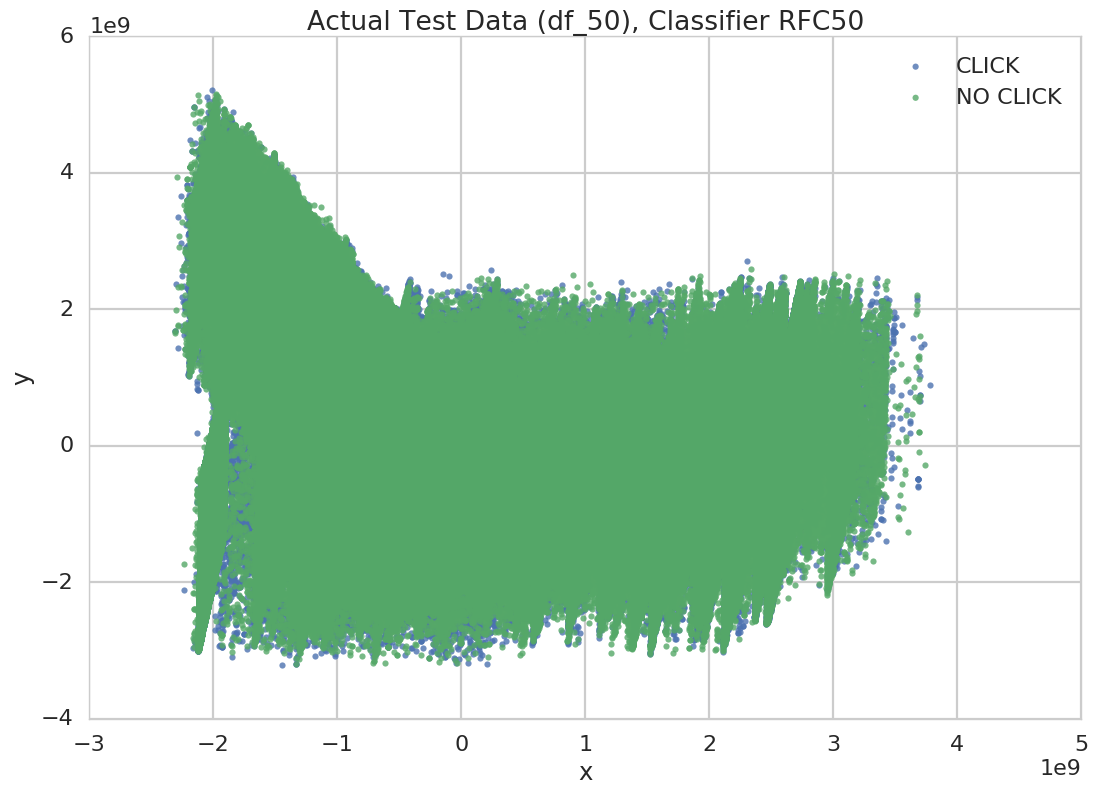

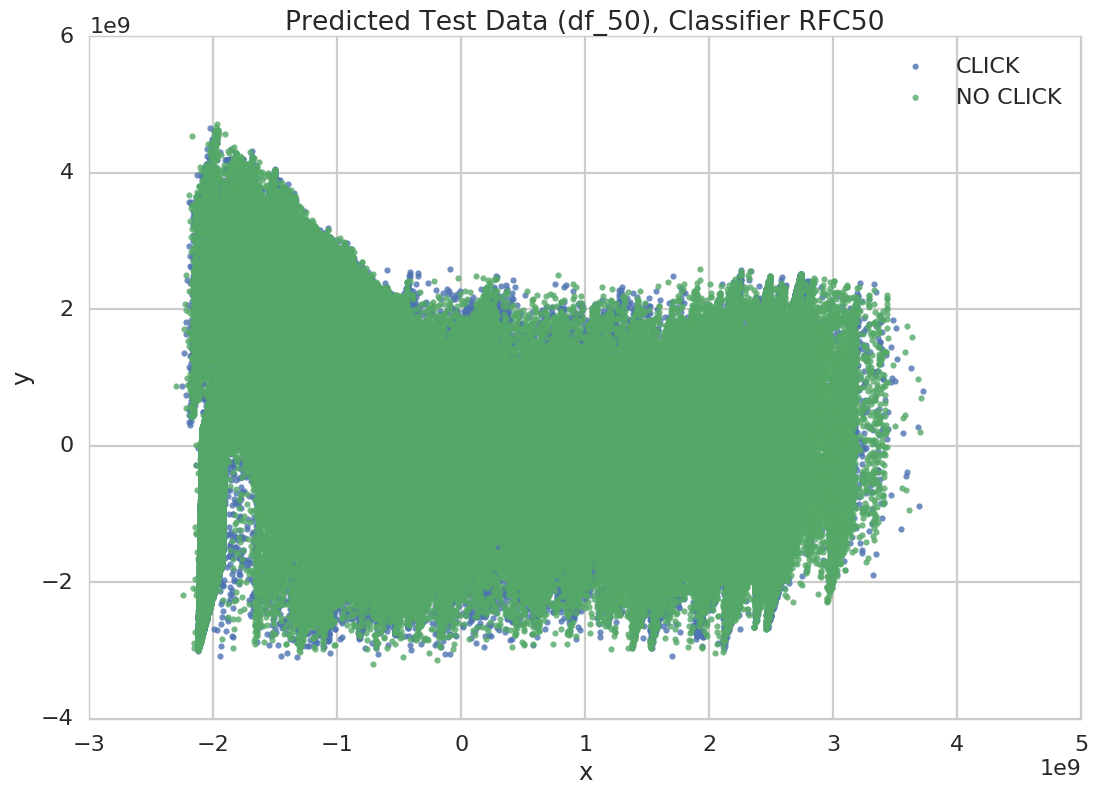

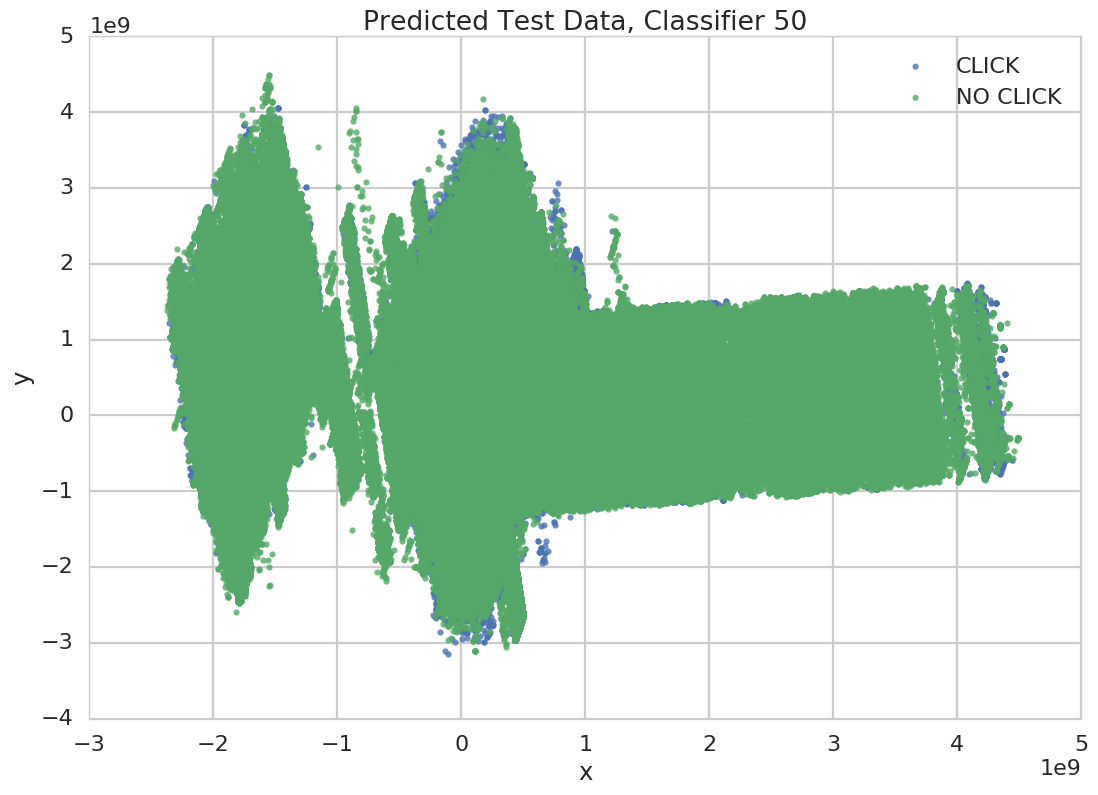

In [33]:
pu.plot_distribution(Xtrain_rfc_50, ytrain_rfc_50, clf_rfc_50, predicted=False, title="Actual Test Data (df_50), Classifier RFC50")
pu.plot_distribution(Xtest_rfc_50, ytest_rfc_50, clf_rfc_50, predicted=True, title="Predicted Test Data (df_50), Classifier RFC50")
pu.plot_distribution(XTEST, None, clf_rfc_50, predicted=True, title="Predicted Test Data, Classifier 50")

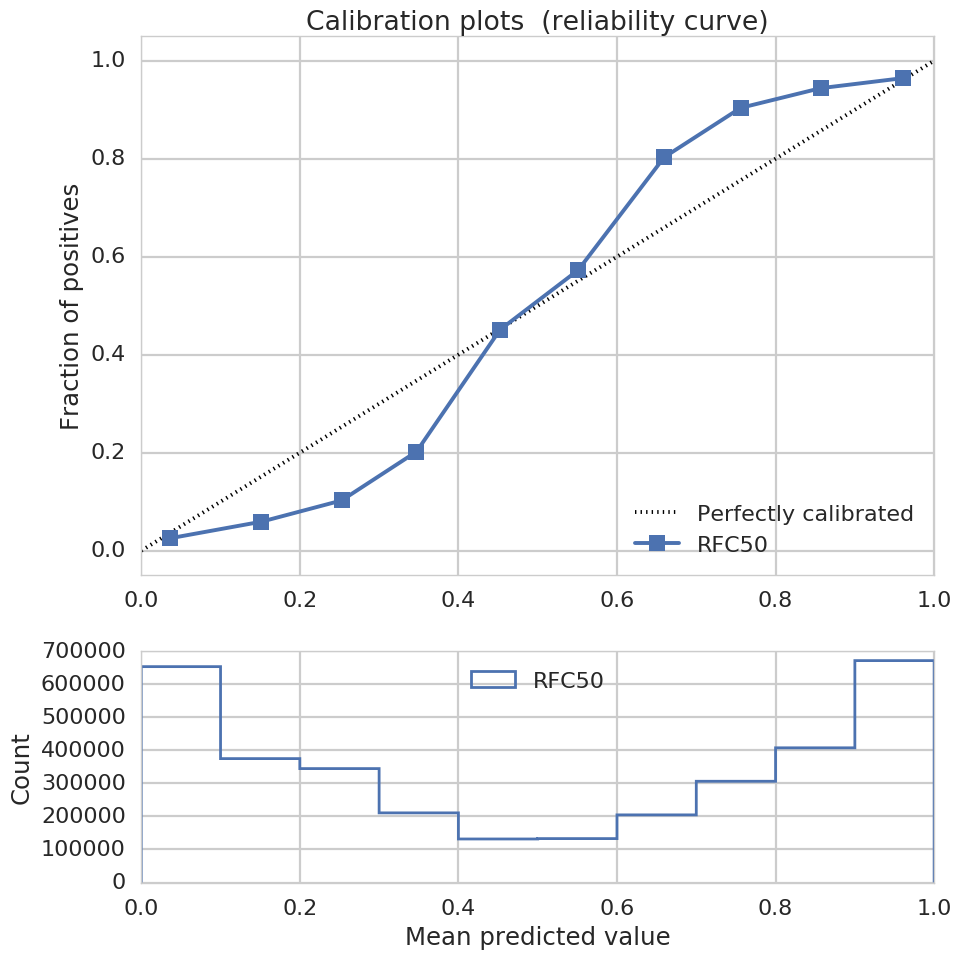

In [37]:
pu.calibration_plot([(clf_rfc_50, 'RFC50')], XS, yS)

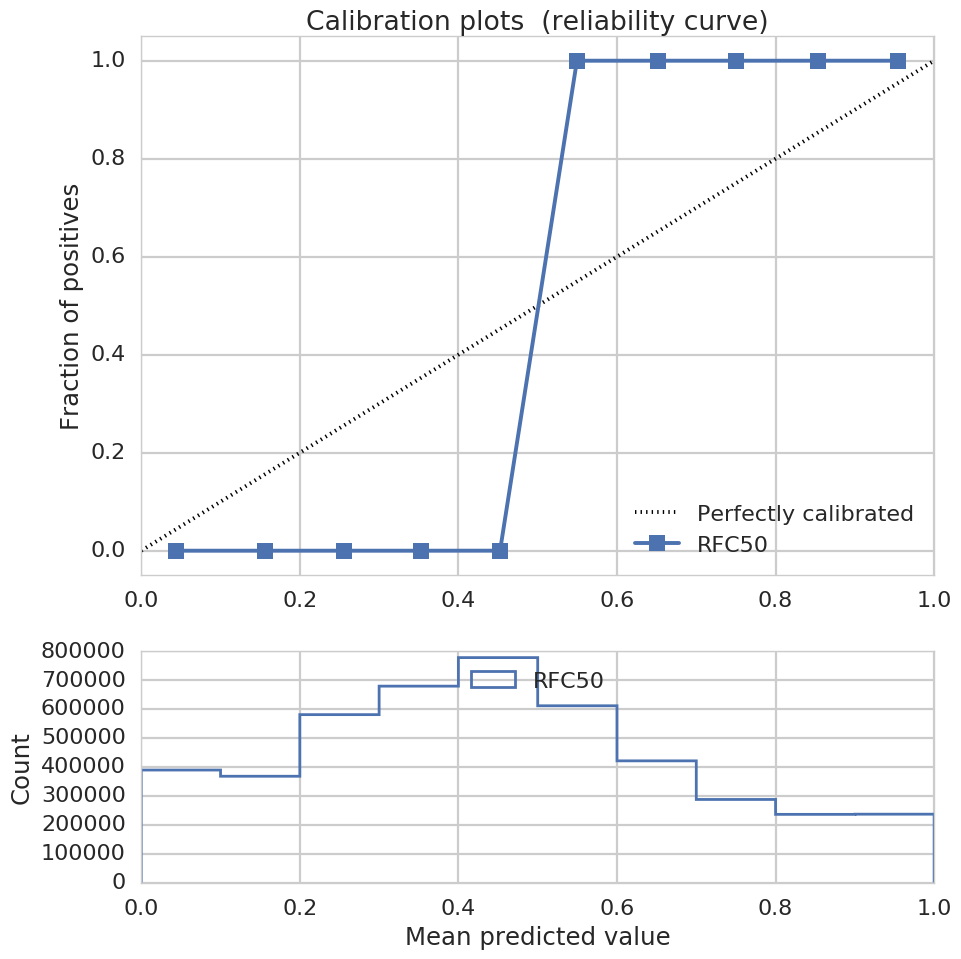

In [38]:
pu.calibration_plot([(clf_rfc_50, 'RFC50')], XTEST, yTEST)

In [3]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import datetime as dt
import project_utils as pu
import model_utils as mu
from sklearn.ensemble import RandomForestClassifier

In [4]:
df_50 = pu.train_data(frac_pos=0.5)
sample_df1 = df_50.sample(frac=0.1)

In [6]:
def pos_neg_ratio(df):
    num_pos = df[df.click > 0].count()[0]
    num_neg = df[df.click == 0].count()[0]
    return ((num_pos / num_neg), num_pos, num_neg)

In [7]:
ratio, num_pos, num_neg = pos_neg_ratio(sample_df1)
print (ratio, num_pos, num_neg)

0.999494670006 686333 686680


In [8]:
rfc_50_120, Xtrain_rfc_50_120, ytrain_rfc_50_120, Xtest_rfc_50_120, ytest_rfc_50_120  = mu.do_classify(
                                                           RandomForestClassifier(oob_score=True), 
                                                           {"n_estimators": [120]}, 
                                                           sample_df1, pu.x_columns, 'click', 0)

BEST PARAMS {'n_estimators': 120}
Accuracy on training data: 0.97
Accuracy on test data:     0.64


In [9]:
def calculate_test_ctr(df_test, yTEST):
    df_test['click'] = yTEST
    neg_predict = len(df_test[df_test.click ==0].index)
    pos_predict = len(df_test[df_test.click >0].index)
    ctr_test = (pos_predict * 100.0) / (pos_predict + neg_predict)
    return ctr_test

In [10]:
test_df = pu.test_data()

In [11]:
XTEST = test_df[pu.x_columns].values
yTEST = rfc_50_120.predict(XTEST)

In [12]:
calculate_test_ctr(test_df.copy(), yTEST)

38.37046014998698

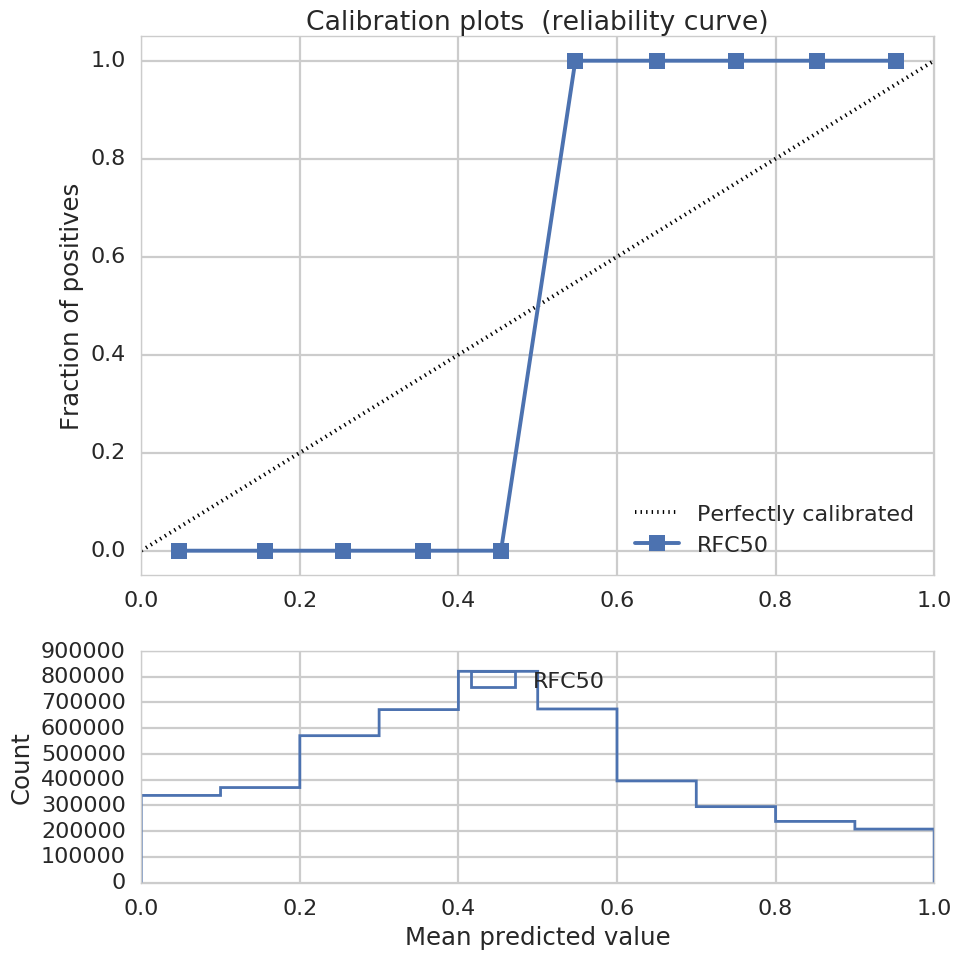

In [13]:
pu.calibration_plot([(rfc_50_120, 'RFC50')], XTEST, yTEST)